In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset
df = pd.read_csv('../data/dataset.csv')

# DV preprocessing
df['DV'] = df['DV'].replace(".", None)
df['DV'] = df['DV'].astype(float)

# print statistics and head
df.head(3)

,ID,TIME,AMT,DV,EVID,MDV,CMT,XEXP,BQL,XEXP2,AGE,BLOOD
0,195,0.0,1,NaN,1,1,1,24.0,0,1,5,0
1,195,59.9,.,NaN,2,1,-1,24.0,0,1,5,0
2,195,59.9,.,0.0,2,1,1,24.0,0,1,5,0


In [3]:
df[df['AMT'] == '1']

,ID,TIME,AMT,DV,EVID,MDV,CMT,XEXP,BQL,XEXP2,AGE,BLOOD
0,195,0.0,1,NaN,1,1,1,24.0,0,1,5,0
12,196,0.0,1,NaN,1,1,1,24.0,1,1,5,0
24,197,0.0,1,NaN,1,1,1,24.0,0,1,5,0
36,198,0.0,1,NaN,1,1,1,24.0,0,1,5,0
48,199,0.0,1,NaN,1,1,1,24.0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1108,370,0.0,1,NaN,1,1,1,32.0,0,0,5,1
1112,371,0.0,1,NaN,1,1,1,32.0,0,0,5,1
1116,372,0.0,1,NaN,1,1,1,26.0,0,0,5,1
1120,373,0.0,1,NaN,1,1,1,26.0,0,0,5,1


(29, 12)


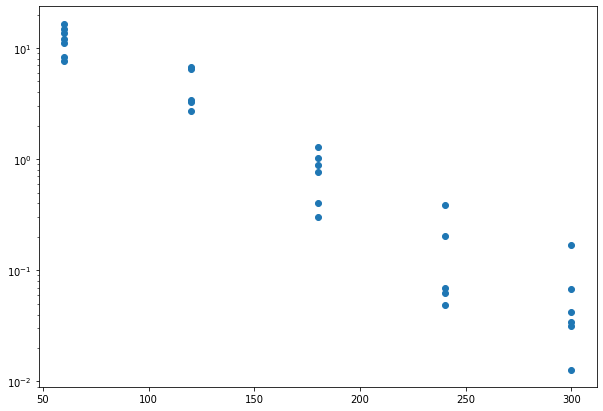

In [4]:
#plotting of observed concentration     (DV) 
# for central paracetamol in larvae     (CMT==2)
# for the observation events            (EVID==0)

temp_df = df[(df['CMT'] == 2) & 
            (df['XEXP2'] == 1) &
            (df['BQL'] == 0) &
            (df['MDV'] == 0) & 
            (df['EVID'] == 0) &
            (df['DV'] is not None ) &
            (df['BLOOD'] == 0)]
print(temp_df.shape)

plt.figure(figsize=(10,7))
plt.yscale("log")
plt.scatter(x=temp_df['TIME'],y=temp_df['DV'])
plt.show()

In [5]:
# Experiment 1
p1 = np.load('../results/exp1/p_val.npy')
s1 = np.load('../results/exp1/s_val.npy')
g1 = np.load('../results/exp1/g_val.npy')
pe1 = np.load('../results/exp1/pe_val.npy')
se1 = np.load('../results/exp1/se_val.npy')
ge1 = np.load('../results/exp1/ge_val.npy')
# Expreriment 2
p2 = np.load('../results/exp2/p_val.npy')
s2 = np.load('../results/exp2/s_val.npy')
g2 = np.load('../results/exp2/g_val.npy')
pe2 = np.load('../results/exp2/pe_val.npy')
se2 = np.load('../results/exp2/se_val.npy')
ge2 = np.load('../results/exp2/ge_val.npy')

In [6]:
temp_df.head(3)

,ID,TIME,AMT,DV,EVID,MDV,CMT,XEXP,BQL,XEXP2,AGE,BLOOD
9,195,60.0,.,7.61,0,0,2,24.0,0,1,5,0
33,197,60.0,.,12.10,0,0,2,24.0,0,1,5,0
45,198,120.0,.,3.42,0,0,2,24.0,0,1,5,0


In [7]:
temp_df.shape

(29, 12)

In [8]:
from sklearn.linear_model import LinearRegression
x = temp_df[['TIME']]
y = temp_df['DV']

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

ModuleNotFoundError: No module named 'sklearn'

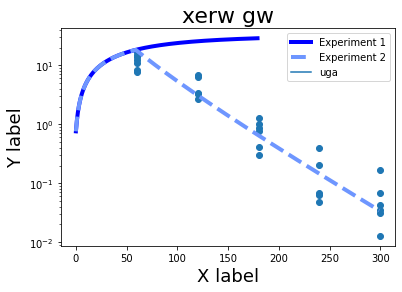

In [ ]:
# Paracetamol
plt.title("xerw gw", size=22)
plt.plot(p1, color='#0000ff', linewidth=4, linestyle='solid', label='Experiment 1')
plt.plot(p2, '--', color='#6e96ff', linewidth=4, label='Experiment 2')
plt.scatter(x=temp_df['TIME'],y=temp_df['DV'])
plt.plot(-0.06*np.arange(0,300), label="uga")

plt.xlabel("X label",  fontsize=18)
plt.ylabel("Y label",  fontsize=18)
plt.xscale("linear")
plt.yscale("log", base=10)
plt.legend(prop={'size': 10})

In [ ]:
temp_df.head(90)

,ID,TIME,AMT,DV,EVID,MDV,CMT,XEXP,BQL,XEXP2,AGE,BLOOD
9,195,60.0,.,7.6100,0,0,2,24.0,0,1,5,0
33,197,60.0,.,12.1000,0,0,2,24.0,0,1,5,0
45,198,120.0,.,3.4200,0,0,2,24.0,0,1,5,0
57,199,120.0,.,2.7100,0,0,2,24.0,0,1,5,0
69,200,120.0,.,3.3000,0,0,2,24.0,0,1,5,0
81,201,180.0,.,0.4060,0,0,2,24.0,0,1,5,0
105,203,180.0,.,1.2900,0,0,2,24.0,0,1,5,0
117,204,180.0,.,0.2990,0,0,2,24.0,0,1,5,0
129,205,240.0,.,0.0692,0,0,2,24.0,0,1,5,0
141,206,240.0,.,0.0489,0,0,2,24.0,0,1,5,0
